# Author : Subas Gupta
## Task 1
## Prediction using Supervised ML

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset using pandas
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

df = pd.read_csv(url)

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.figure_factory import create_table

In [6]:
table = create_table(df.head())
py.iplot(table)

In [7]:
# plotting scatter plot for checking the distribution of data points
px.scatter(df, x=df['Hours'], y=df['Scores'])

In [8]:
# from above scatter plot we can see that the data points are linearly distributed
# so we can use the linear regression to predict the future outputs

In [9]:
X = df.iloc[:, :-1].values  # selecting all rows and all columns except last column  
y = df.iloc[:, 1].values    # selecting all rows and last column only (y is the our target attribute)

In [10]:
# lets check X and y
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [12]:
# spiliting our datasets in train and test set,80% of data are in train set and 20% in test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [13]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [14]:
#lets train of data using linear regression 
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [15]:
x_range = np.linspace(X.min(), X.max(), 100)
y_range = regressor.predict(x_range.reshape(-1, 1))

In [16]:
fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='Prediction Line')
])
fig.show()

In [17]:
y_test

array([20, 27, 69, 30, 62])

In [18]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [19]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
table = create_table(df1.head())
py.iplot(table)


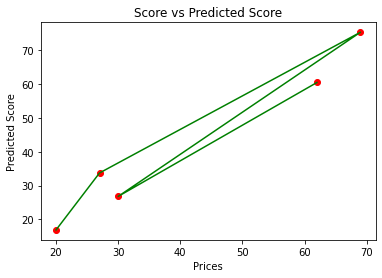

In [20]:
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_pred,c='g')
plt.xlabel("Prices")
plt.ylabel("Predicted Score")
plt.title("Score vs Predicted Score")
plt.show()

In [20]:
# We can also test with own data
hours = np.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
